In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install netCDF4

In [ ]:
import netCDF4
import numpy as np
from osgeo import gdal,osr,ogr
import matplotlib.pyplot as plt
import h5py
import os 

In [ ]:
print(os.getcwd()) 

/content


In [ ]:

# function to create the mask of your shapefile

def makeMask(lon,lat,res):
    shape_file = ogr.Open(shapefile)
    source_layer = shape_file.GetLayer()
    dst_filename = '/tmp/x_tmp.nc'

    new_nc_file = gdal.GetDriverByName("netCDF").Create('dst_filename', 450, 357, 1, gdal.GDT_Byte)
    print(lon.min())
    print(lat.max())
    print( new_nc_file)
#     print(res)
#     mem_ds.SetGeoTransform([44.4, res, 0, 37.7, 0, -res ])
    new_nc_file.SetGeoTransform([55.4, res, 0, 41.5, 0, -res ])
#     mem_ds.SetGeoTransform([444720, 30, 0, 3751320, 0, -30 ])
    band =  new_nc_file.GetRasterBand(1)
    # Rasterize shapefile to grid
    gdal.RasterizeLayer( new_nc_file, [1], source_layer, burn_values=[1])
 
    # Get rasterized shapefile as numpy array
    array = band.ReadAsArray()
 
    # Flush memory file
    mem_ds = None
    band = None
    return array


In [ ]:
# set the data directories
datadir = "/content/drive/My Drive/"
shapefile = "/content/drive/My Drive/Lahore/Lhr.shp"
infile = "/FYP files/NO5.nc"
ncs = datadir + infile

In [ ]:
nc1 = netCDF4.Dataset(ncs,'r')
nc = nc1['/PRODUCT']
print(nc)

<class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(357), ground_pixel(450), time(1), corner(4), layer(34)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), float32 latitude(time, scanline, ground_pixel), float32 longitude(time, scanline, ground_pixel), int32 delta_time(time, scanline, ground_pixel), <class 'str'> time_utc(time, scanline), uint8 qa_value(time, scanline, ground_pixel), float32 sulfurdioxide_total_vertical_column(time, scanline, ground_pixel), float32 sulfurdioxide_total_vertical_column_precision(time, scanline, ground_pixel), int32 layer(layer)
    groups: SUPPORT_DATA


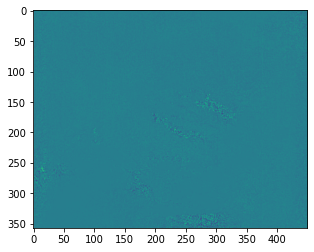

0.0801239
55.408432
41.576008
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa12a8cb7e0> >
<class 'numpy.ndarray'>


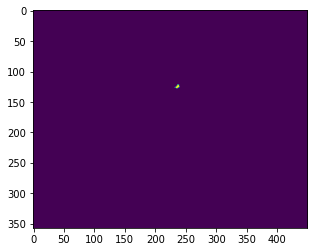

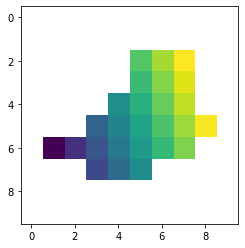

In [ ]:
 
# read the netcdf data file
nc1 = netCDF4.Dataset(ncs,'r')
nc = nc1['/PRODUCT']
# print(nc)
# get the precipitation
so2 = nc.variables['sulfurdioxide_total_vertical_column'][:]
so2 = np.squeeze(so2, axis = 0)

# print(pr)
# show the precipitation
plt.imshow(so2)
plt.show()

# get the longitude information
lons = nc.variables['longitude'][:]
lons = np.squeeze(lons, axis = 0)
# get the latitude information
lats = nc.variables['latitude'][:]
# calculate the cellsize
lats = np.squeeze(lats, axis = 0)
# print(lons.shape)
# print(lons[:][0][0])
cellsize = lons[:][0][1] - lons[:][0][0]

# print(lons)
# print(lats)
print(cellsize)
# create the mask
mask = makeMask(lons, lats, cellsize)
print(type(mask))# show the mask
plt.imshow(mask)
plt.show()

# mask the precipitation data
so2_nc = np.ma.masked_where(mask==0, lons)
plt.imshow(so2_nc[120:130, 231:241])
plt.show()
 


In [ ]:
nco = netCDF4.Dataset('lhr.nc','w',clobber=True)

In [ ]:
print(nco)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 


In [ ]:
print(type(mask))

In [ ]:
print(mask.shape)

In [ ]:
print(lons.size)

In [ ]:
print(precip)

In [ ]:
print(pr.shape)